## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the slope chart and for customization
- [seaborn](https://python-graph-gallery.com/seaborn/) is used for creating the parallel plot
- `pandas` is used for loading the dataset

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Dataset

The data used is a **famous dataset** where each line represents a country, by year, with various measurements, from [Gapminder](https://www.gapminder.org). 

You can find out more about the dataset on this [Kaggle post](https://www.kaggle.com/datasets/albertovidalrod/gapminder-dataset).

To retrieve the data, we download them directly from this [github repository](https://github.com/jennybc/gapminder/tree/main). 

In [2]:
url = "https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv"
df = pd.read_csv(url, sep='\t')

## Parallel plot

In the following [parallel plot](https://python-graph-gallery.com/parallel-plot/), we show the position of each continent in terms of average for 3 different variables: `GDP/capita`, `life expectancy` and `population`.

However, as these variables are at **different scales**, it is not possible to have a single y-axis. For this reason, we don't include one, leaving the graph only to tell us **which continent has a higher average** than another, for each variable studied. If your situation is different, **feel free to display the scale**.

We still need to **normalize our data** so that we can represent the variables on a single graph. To do this, we perform a `z-score normalization`, which consists in transforming our variables so that they have a **mean of 0** and a **standard deviation of 1**. 

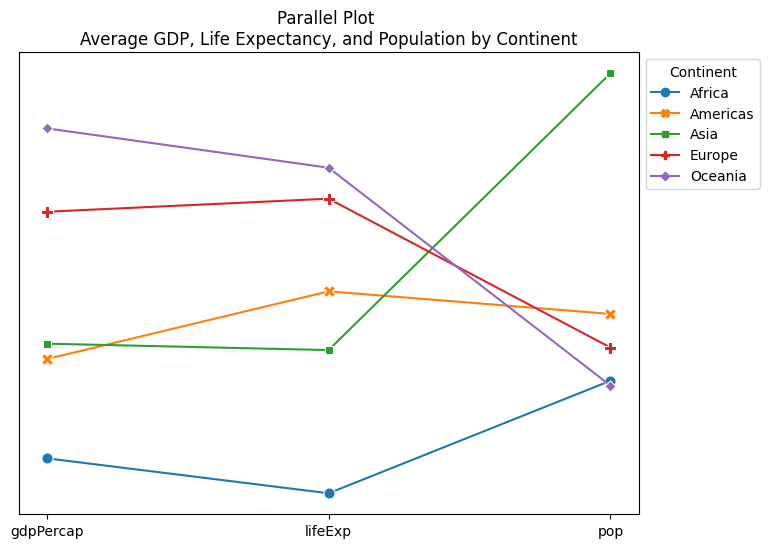

In [3]:
# Calculate the average values for each continent
average_data = df.groupby('continent')[['gdpPercap', 'lifeExp', 'pop']].mean()

# Normalize the data for better visualization
normalized_data = (average_data - average_data.mean()) / average_data.std()

# Create parallel plot
plt.figure(figsize=(8, 6))
parallel_plot = sns.lineplot(data=normalized_data.transpose(),
                             dashes=False,
                             markers=True,
                             markersize=8)

# Add title
plt.title('Parallel Plot \nAverage GDP, Life Expectancy, and Population by Continent')

# Remove y-axis ticks and tick labels
plt.yticks([])

# Add legend
plt.legend(title='Continent',
           bbox_to_anchor=(1, 1), # Shift legend to the right
          )

# Display the chart
plt.show()

## Going further

This article explained how to build a basic parallel coordinates chart with Seaborn.

For more examples of **how to create or customize** your parallel plots with Python, see the [parallel plot section](https://python-graph-gallery.com/parallel-plot/) of the gallery. 

You may also be interested in creating a [parallel plot with pandas](https://python-graph-gallery.com/150-parallel-plot-with-pandas/) or with `Plotly`.